<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [40]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función para cargar datos
def cargar_datos(dataset_name):
    client = boto3.client('iotanalytics')
    response = client.get_dataset_content(datasetName=dataset_name)
    url = response['entries'][0]['dataURI']
    df = pd.read_csv(url)
    return df

# Nombre del dataset 
dataset_name = 'irrigationdataset'

# Cargar los datos
df = cargar_datos(dataset_name)

# Mostrar los primeros registros del DataFrame
df

,tiempo_iso,objeto,temperatura
0,2024-06-22T22:26:24.000,thing,24.799999
1,2024-06-23T04:14:12.000,thing,23.400000
2,2024-06-23T04:14:20.000,thing,23.400000
3,2024-06-23T04:14:28.000,thing,23.799999
4,2024-06-22T22:37:44.000,thing,27.600000
5,2024-06-22T22:31:36.000,thing,24.799999
6,2024-06-22T16:27:32.000,thing,22.600000
7,2024-06-22T17:58:33.000,thing,22.200001
8,2024-06-22T22:34:00.000,thing,31.299999
9,2024-06-22T22:34:08.000,thing,28.500000


In [41]:
# Estadísticas descriptivas
print(df.describe())

       temperatura
count    35.000000
mean     24.465714
std       2.639624
min      21.400000
25%      22.600000
50%      23.400000
75%      25.549999
max      31.299999


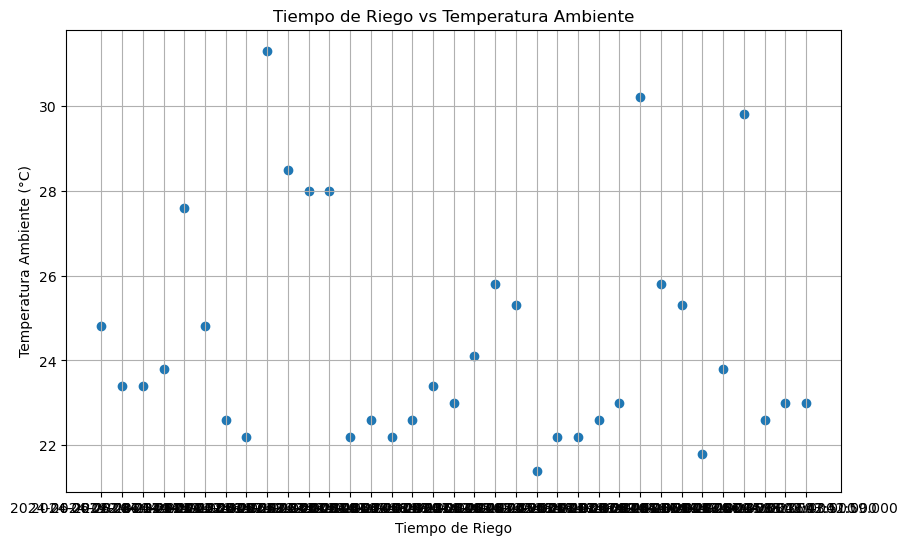

In [43]:
# Visualización de datos
plt.figure(figsize=(10, 6))
plt.scatter(df['tiempo_iso'], df['temperatura'])
plt.title('Tiempo de Riego vs Temperatura Ambiente')
plt.xlabel('Tiempo de Riego')
plt.ylabel('Temperatura Ambiente (°C)')
plt.grid(True)
plt.show()

In [45]:
# Agrupamos los datos y contamos las ocurrencias de cada tiempo de riego
tiempo_counts = df['tiempo_iso'].value_counts()

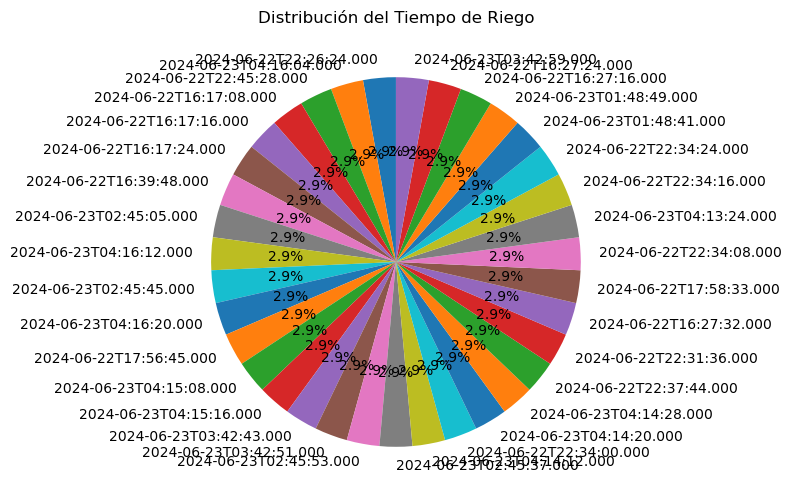

In [46]:
# Gráfico de torta para la distribución del tiempo de riego
plt.figure(figsize=(6, 6))
plt.pie(tiempo_counts, labels=tiempo_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Tiempo de Riego')
plt.show()

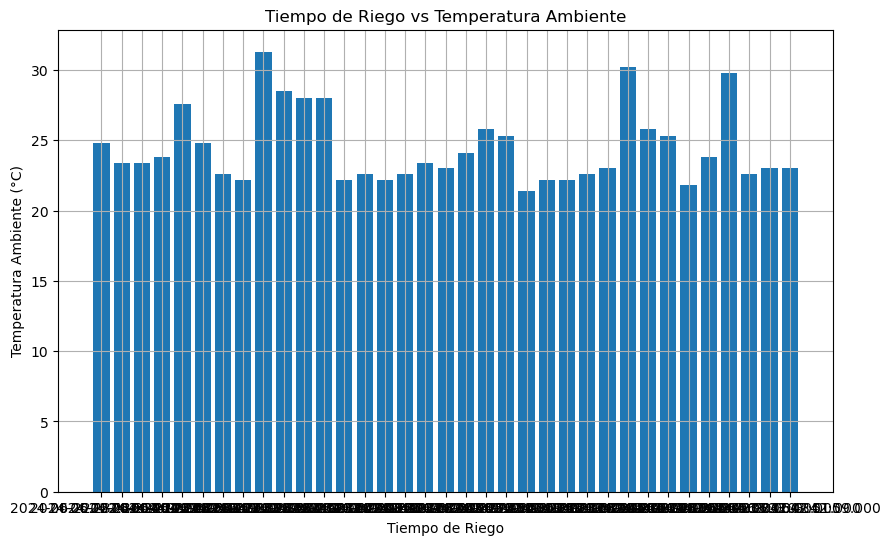

In [49]:
# Gráfico de barras para la relación entre tiempo de riego y temperatura
plt.figure(figsize=(10, 6))
plt.bar(df['tiempo_iso'], df['temperatura'])
plt.title('Tiempo de Riego vs Temperatura Ambiente')
plt.xlabel('Tiempo de Riego')
plt.ylabel('Temperatura Ambiente (°C)')
plt.grid(True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar datos desde el archivo subido
data = cargar_datos(dataset_name)

# Verificar los datos
print(data.head())
print(data.dtypes)

                tiempo_iso objeto  temperatura
0  2024-06-22T22:26:24.000  thing    24.799999
1  2024-06-23T04:14:12.000  thing    23.400000
2  2024-06-23T04:14:20.000  thing    23.400000
3  2024-06-23T04:14:28.000  thing    23.799999
4  2024-06-22T22:37:44.000  thing    27.600000
tiempo_iso      object
objeto          object
temperatura    float64
dtype: object


In [52]:
# Convertir la columna tiempo_iso a datetime
data['tiempo_iso'] = pd.to_datetime(data['tiempo_iso'])

# Convertir la columna temperatura a numérica
data['temperatura'] = pd.to_numeric(data['temperatura'], errors='coerce')

# Verificar tipos de datos nuevamente
print(data.dtypes)

tiempo_iso     datetime64[ns]
objeto                 object
temperatura           float64
dtype: object


## Modelo predictivo para prever las necesidades de riego basado en la temperatura ambiente

In [53]:
# Crear una columna riego_necesario (0 = no regar, 1 = regar) basado en una regla ficticia de temperatura
data['riego_necesario'] = (data['temperatura'] > 25).astype(int)

# Separar las características (temperatura) y el objetivo (riego_necesario)
X = data[['temperatura']]
y = data['riego_necesario']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrenar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluar el modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Error cuadrático medio del modelo: {mse}')


Error cuadrático medio del modelo: 0.0


### *Modelo* de regresión para predecir la mejor hora para regar las plantas según la temperatura

Error cuadrático medio del modelo: 12.883867213490722


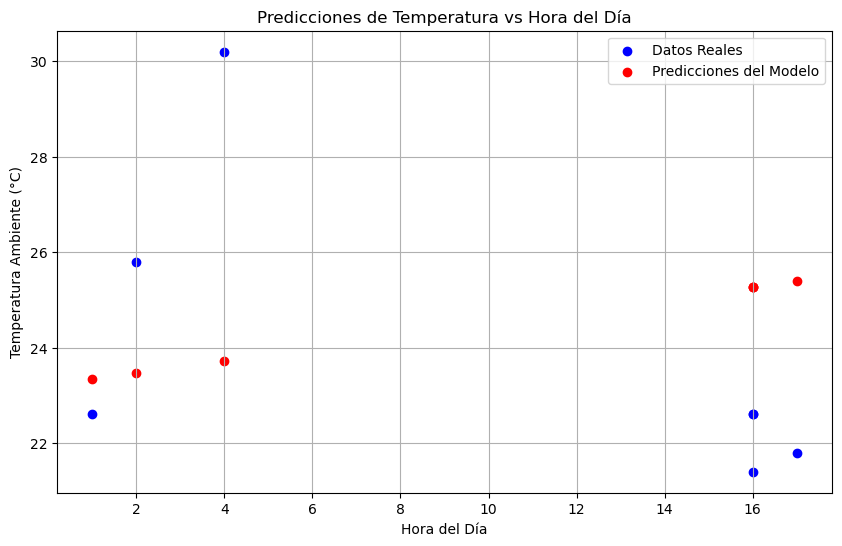

In [54]:
# Extraer la hora del día como una característica numérica
data['hora'] = data['tiempo_iso'].dt.hour

# Separar las características (hora) y el objetivo (temperatura)
X = data[['hora']]
y = data['temperatura']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Error cuadrático medio del modelo: {mse}')

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, predictions, color='red', label='Predicciones del Modelo')
plt.title('Predicciones de Temperatura vs Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Temperatura Ambiente (°C)')
plt.legend()
plt.grid(True)
plt.show()


<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>